
# Project: Investigate a Dataset - [TMDb-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This dataset monitors information about movies.for instance their bugets,popularity, genres, casts, and more. it consists of 21 columns and 10866 rows. the tables are as following:  
{'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'}  

### Question(s) for Analysis
>1.Is the movie industry going forward or backward?  
2.What is the total profit for each year?   
3.What is the best movie genre to invest in?
4.Does the movie duration (runtime) changes from year to year?
5.what is the most frequent genre being produced?


In [170]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

In [84]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd
mvi_df=pd.read_csv("tmdb-movies.csv")
mvi_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [82]:
mvi_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

we can drop some columns and rows with a lot of missed data 


### Data Cleaning
>1.erase duplicated rows

In [129]:
mvi_df.drop_duplicates(inplace=True)

>2. replace zeros with NANs  
**here I replace every zero with Nan because zero doesn't make sense  
and would misdirect us when calculating the statistic measures**

In [130]:
mvi_df.replace(0,np.NaN,inplace=True)

>3. drop columns we are not interested in

In [133]:
# we drop unnecessary columns with a lot of nan valuses
del_=[  'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies','tagline']
mvi_df= mvi_df.drop(del_,axis=1)
mvi_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2947,7.3,2015


>4.droping null rows from revenue, budget and runtime 

In [126]:
# we drop the rows with incomplete information
mvi_df.dropna(subset = ['budget','revenue','runtime'], inplace = True)
print('the shape of this data is {} rows and {} columns'.format(mvi_df.shape[0],mvi_df.shape[1]))

the shape of this data is 3854 rows and 14 columns


In [136]:
mvi_df.isnull().sum()    

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              4
director          1
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

now all the numeric columns are fixed (doesn't have null)

>5.casting release_date column to datetime. budget and revenue to int64

In [143]:
mvi_df.release_date = pd.to_datetime(mvi_df['release_date'])
mvi_df[['budget', 'revenue']]=mvi_df[['budget', 'revenue']].applymap(np.int64)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is profit of each movie?)

In [155]:
# profit = revenue - budget
mvi_df.insert(4,'profit_',mvi_df['revenue']-mvi_df['budget'])
mvi_df.head(3)

,id,popularity,budget,revenue,profit_,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015


### Research Question 2  ( comparing Year of release with Profitability)

Text(0.5, 1.0, 'Year of release vs Profitability')

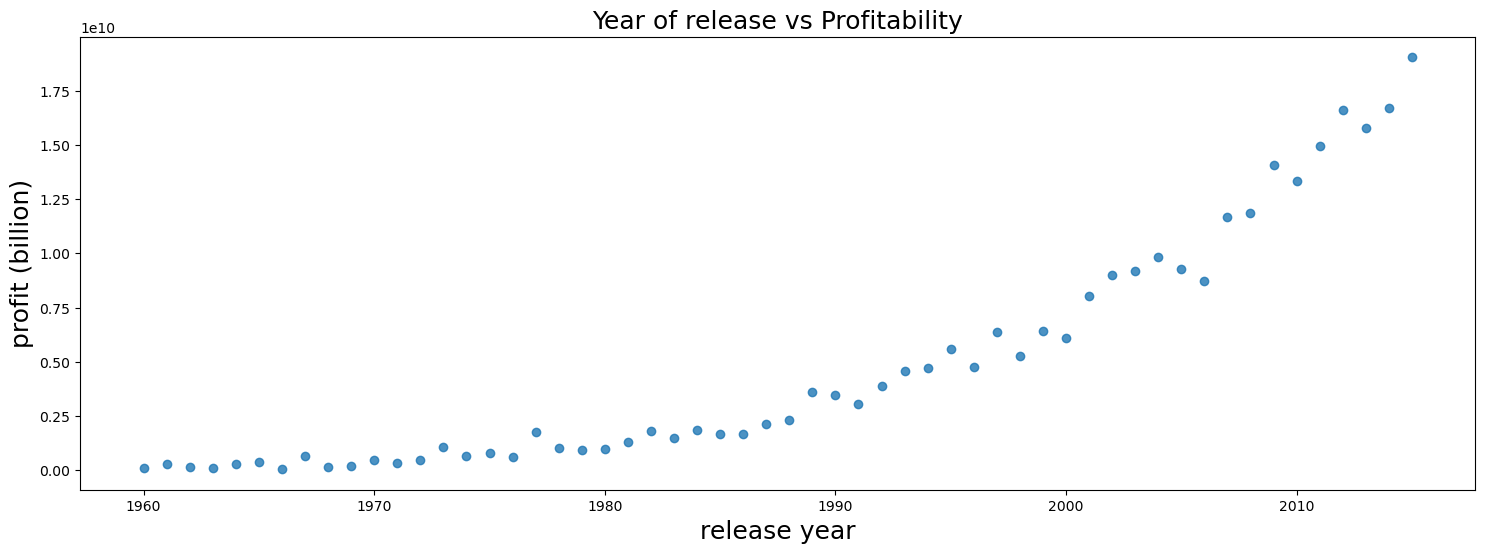

In [218]:
plot_ =pd.DataFrame(mvi_df.groupby('release_year',as_index=False).sum()[['profit_','release_year']])
plt.figure(figsize=(18,6), dpi = 100)
plt.scatter(plot_['release_year'],plot_['profit_'],alpha=0.8)
plt.xlabel('release year', fontsize=18)
plt.ylabel('profit (billion)', fontsize=18)
plt.title('Year of release vs Profitability', fontsize=18)


we notice that the movie idustry florish by years passing  
the highest year in profit is 2015 (the last year)

### Research Question 3  ( how the runtime differ from year to year)

Text(0.5, 1.0, 'Rutime vs release year')

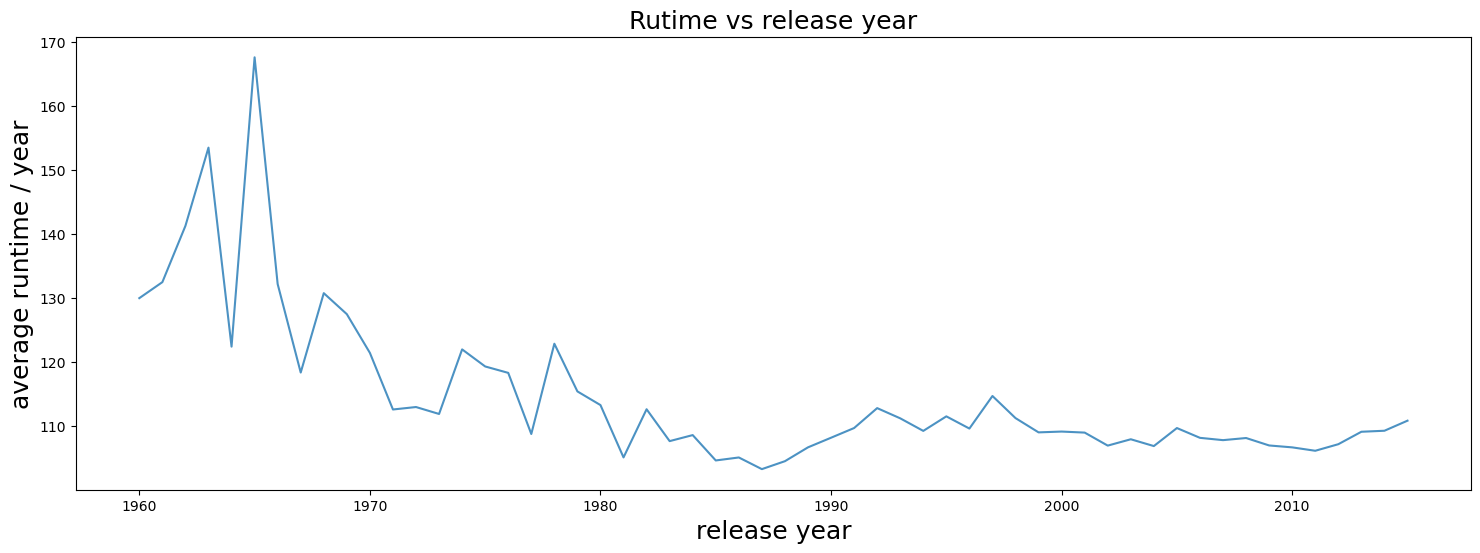

In [223]:
plot_ =pd.DataFrame(mvi_df.groupby('release_year').mean()['runtime'])
plt.figure(figsize=(18,6), dpi = 100)
plt.plot(plot_,alpha=0.8)
plt.xlabel('release year', fontsize=18)
plt.ylabel('average runtime / year', fontsize=18)
plt.title('Rutime vs release year', fontsize=18)

the figure tells the runtime was inconsistent in the early times

In [231]:
plot_.loc[1985:].mean()

runtime    108.455634
dtype: float64

the average runtime for a movie now a days is around 108 mins

### Research Question 4  ( the distribution of genres)

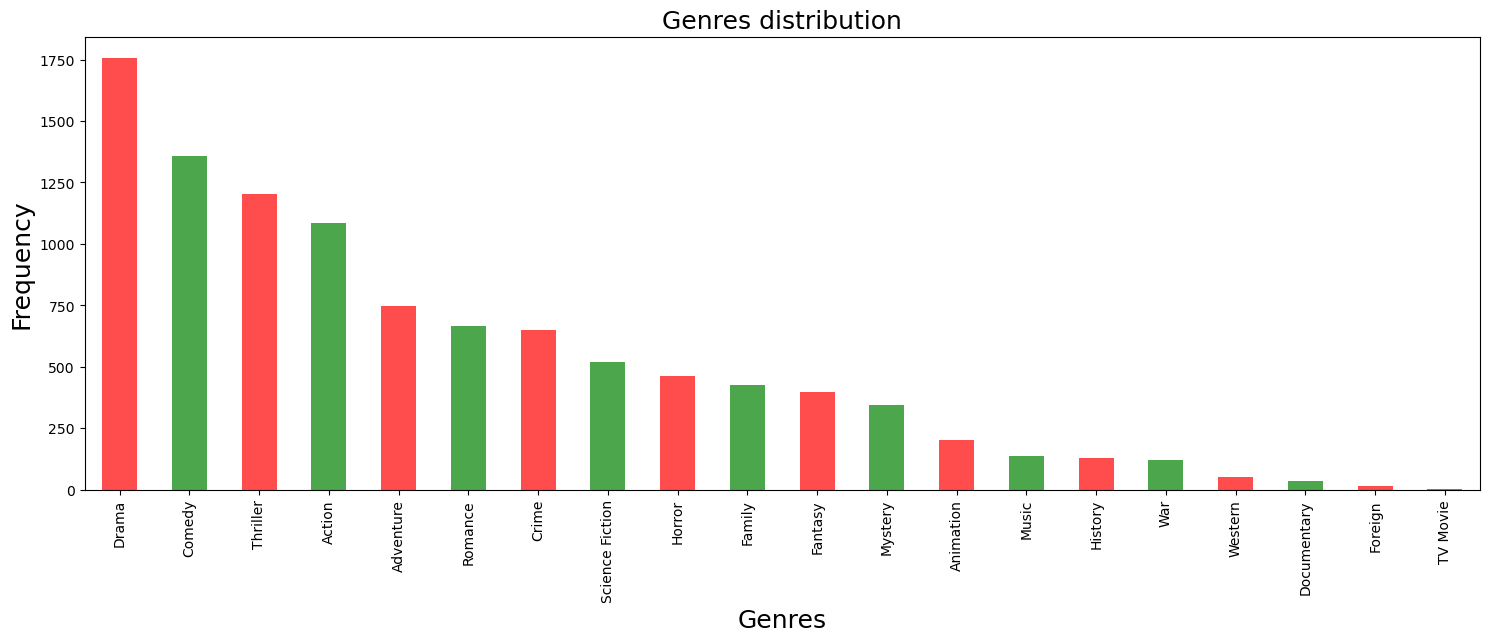

In [377]:
data = mvi_df['genres'].str.cat(sep = '|')
Genres=pd.Series(data.split('|'))
x=Genres.value_counts()
plt.figure(figsize=(18,6), dpi = 100)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Genres distribution', fontsize=18)
x.plot(kind='bar', color=['red','green'], alpha=.7);

the most frequent gerne is Drama

### Research Question 5  ( comparing budget, revenue and profit for every genre)

we will compare between the revenue, budget and peofit for the most frequent genres:  
Drama Comedy Thriller Action Adventure Romance Crime Science Fiction
 

In [370]:
# we create three datagrams for each of budget, revenue and profit
genList=['Drama','Comedy', 'Thriller', 'Action','Adventure','Romance','Crime','Science Fiction']
cols=['id','original_title','budget','genre']
budget_df= pd.DataFrame()
revenue_df= pd.DataFrame()
profit_df= pd.DataFrame()
gen_df= pd.DataFrame(columns=['id','original_title','budget','revenue','profit_','genre'])
for gen in genList:
    gen_df=mvi_df[mvi_df['genres'].str.contains(gen)][['id','original_title','budget','revenue','profit_']]
    gen_df['genre']=np.repeat(gen,len(gen_df))
    budget_df=budget_df.append(gen_df[['id','original_title','budget','genre']])
    revenue_df=revenue_df.append(gen_df[['id','original_title','revenue','genre']])
    profit_df=profit_df.append(gen_df[['id','original_title','profit_','genre']])
    
profit_df.to_csv('Profit_datagram.csv')
revenue_df.to_csv('revenue_datagram.csv')
budget_df.to_csv('budget_datagram.csv')

### for budget

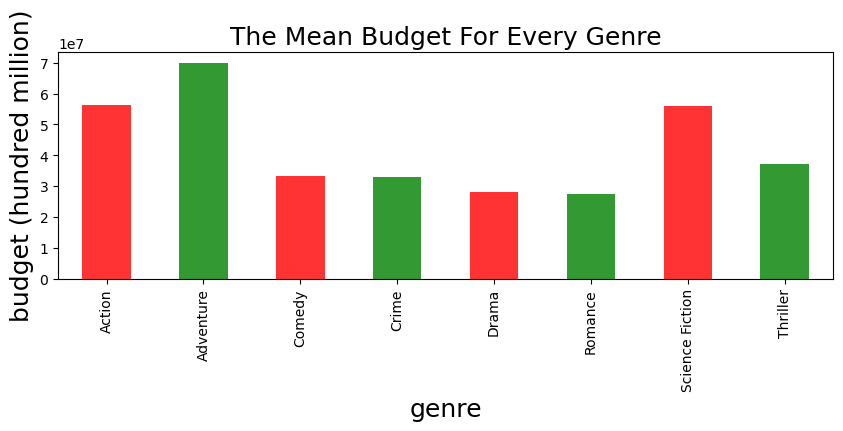

In [398]:
plot_bdgt=budget_df.groupby('genre')['budget'].mean()
plt.figure(figsize=(10,3), dpi = 100)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('budget (hundred million)', fontsize=18)
plt.title('The Mean Budget For Every Genre', fontsize=18)
plot_bdgt.plot(kind='bar', color=['red','green'], alpha=0.8);

### it makes sense that Adventure, action and science fiction genres aquire the higher budget

### for revenue

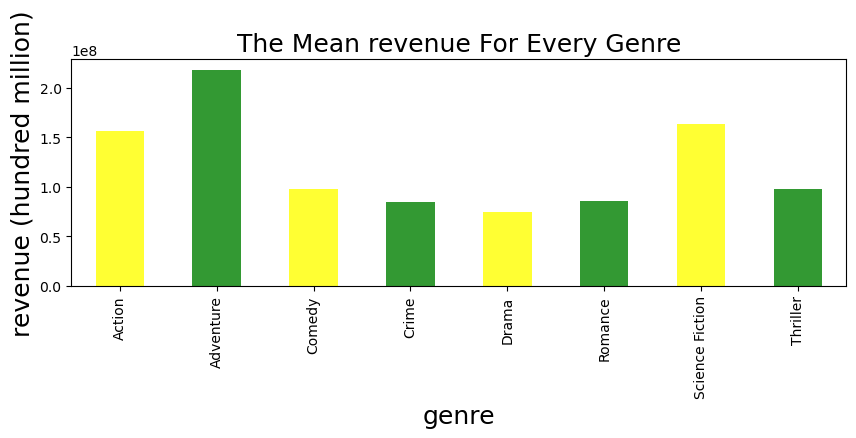

In [397]:
plot_rvn=revenue_df.groupby('genre')['revenue'].mean()
plt.figure(figsize=(10,3), dpi = 100)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('revenue (hundred million)', fontsize=18)
plt.title('The Mean revenue For Every Genre', fontsize=18)
plot_rvn.plot(kind='bar', color=['yellow','green'], alpha=0.8);

### for profit

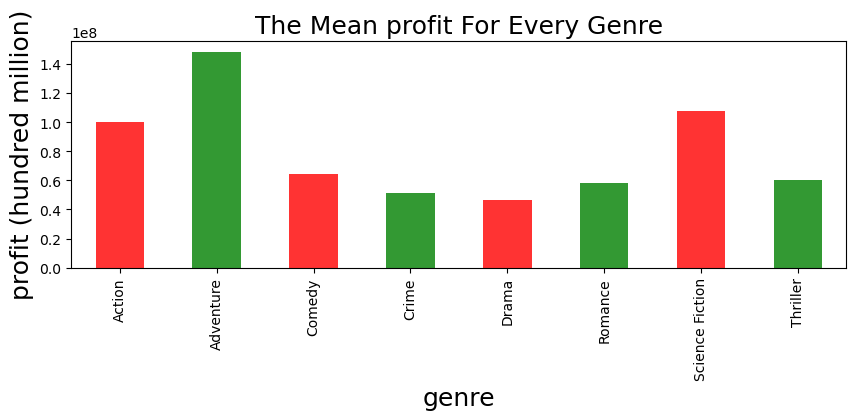

In [399]:
plot_prft=profit_df.groupby('genre')['profit_'].mean()
plt.figure(figsize=(10,3), dpi = 100)
plt.xlabel('Genres', fontsize=18)
plt.ylabel('profit (hundred million)', fontsize=18)
plt.title('The Mean profit For Every Genre', fontsize=18)
plot_prft.plot(kind='bar', color=['red','green'], alpha=0.8);

Text(0.5, 1.0, 'Comparison Between Budget, Revenue and Profit')

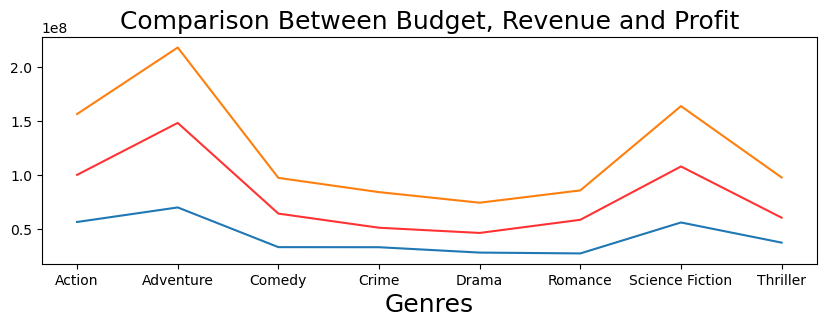

In [404]:
plt.figure(figsize=(10,3), dpi = 100)

ax = plot_bdgt.plot()
ax=plot_rvn.plot(ax=ax)
plot_prft.plot(ax=ax, color=['red','green','orange'], alpha=0.8);
plt.xlabel('Genres', fontsize=18)
plt.title('Comparison Between Budget, Revenue and Profit', fontsize=18)


In [352]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

## conclusions

>1.from question 2 we conclude that movie industry is florishing since the trend line is going upwards all along the time line  
2.from question 3 we conclude that the number of Drama, comedy and thriller movies is way bigger than adventure and science fiction which  is are more profitable. and that is maybe because genres like drama is cheaper to produce.  
3.from question 4 we conclude that runtime(movie duration) became more consistent in the late years(after 1980)  
4.from question 5 we conclude that it is a good idea to invest money in movies for genres like:Drama, Comedy, Thriller, Action, Adventure, Romance, Crime and Science Fiction. since we noticed that the profit is always high.  
5.Adventure movies has the highest profit mean but it also has the highest budget  
6.The first priority for investment is adventure and science fiction. if you don't have enough money then you would rather invest in drama comedy or thriller.

### limitations

>1.the origional data was 10868 and after deleting rows with null values it turned 3854 which endicates that there is about 65% of rows contains null values.  
2.There wasn't enough data discussing some genres such as TV movies, Foreign, documentary. Which might give us incomplete information about the population of those genres.  
3.The way of recording the genres in th dataset was a bit difficult to handle while analysis
